## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 2.20152 | train_mse: 1.60375 | train_mae: 0.89976 |  0:00:01s


epoch 1  | loss: 0.94022 | train_mse: 1.42381 | train_mae: 0.81914 |  0:00:01s


epoch 2  | loss: 0.65655 | train_mse: 0.70135 | train_mae: 0.55987 |  0:00:01s


epoch 3  | loss: 0.50595 | train_mse: 0.3597  | train_mae: 0.41607 |  0:00:02s


epoch 4  | loss: 0.44837 | train_mse: 0.45767 | train_mae: 0.4686  |  0:00:02s


epoch 5  | loss: 0.39543 | train_mse: 0.35211 | train_mae: 0.43201 |  0:00:02s


epoch 6  | loss: 0.35068 | train_mse: 0.26232 | train_mae: 0.35225 |  0:00:03s


epoch 7  | loss: 0.35136 | train_mse: 0.27268 | train_mae: 0.36773 |  0:00:03s


epoch 8  | loss: 0.36984 | train_mse: 0.20378 | train_mae: 0.31547 |  0:00:03s


epoch 9  | loss: 0.2652  | train_mse: 0.20101 | train_mae: 0.31985 |  0:00:04s


epoch 10 | loss: 0.27788 | train_mse: 0.19283 | train_mae: 0.31163 |  0:00:04s


epoch 11 | loss: 0.26563 | train_mse: 0.18896 | train_mae: 0.31976 |  0:00:04s


epoch 12 | loss: 0.28878 | train_mse: 0.16479 | train_mae: 0.28622 |  0:00:05s


epoch 13 | loss: 0.27479 | train_mse: 0.16075 | train_mae: 0.28704 |  0:00:05s


epoch 14 | loss: 0.30266 | train_mse: 0.17265 | train_mae: 0.30045 |  0:00:06s


epoch 15 | loss: 0.22668 | train_mse: 0.20686 | train_mae: 0.32507 |  0:00:06s


epoch 16 | loss: 0.29438 | train_mse: 0.18396 | train_mae: 0.30695 |  0:00:06s


epoch 17 | loss: 0.24354 | train_mse: 0.16627 | train_mae: 0.29659 |  0:00:07s


epoch 18 | loss: 0.26546 | train_mse: 0.16253 | train_mae: 0.28287 |  0:00:07s


epoch 19 | loss: 0.23025 | train_mse: 0.15447 | train_mae: 0.27367 |  0:00:08s


epoch 20 | loss: 0.23142 | train_mse: 0.15668 | train_mae: 0.26773 |  0:00:08s


epoch 21 | loss: 0.23525 | train_mse: 0.16585 | train_mae: 0.27778 |  0:00:08s


epoch 22 | loss: 0.20507 | train_mse: 0.14005 | train_mae: 0.26301 |  0:00:09s


epoch 23 | loss: 0.2472  | train_mse: 0.16299 | train_mae: 0.27855 |  0:00:09s


epoch 24 | loss: 0.25081 | train_mse: 0.15957 | train_mae: 0.27782 |  0:00:10s


epoch 25 | loss: 0.18712 | train_mse: 0.15365 | train_mae: 0.27227 |  0:00:10s


epoch 26 | loss: 0.2117  | train_mse: 0.15124 | train_mae: 0.26881 |  0:00:11s


epoch 27 | loss: 0.24766 | train_mse: 0.16448 | train_mae: 0.2862  |  0:00:11s


epoch 28 | loss: 0.21045 | train_mse: 0.13047 | train_mae: 0.25475 |  0:00:11s


epoch 29 | loss: 0.21359 | train_mse: 0.14784 | train_mae: 0.26382 |  0:00:12s


epoch 30 | loss: 0.19368 | train_mse: 0.15769 | train_mae: 0.28559 |  0:00:13s


epoch 31 | loss: 0.17368 | train_mse: 0.12711 | train_mae: 0.25479 |  0:00:14s


epoch 32 | loss: 0.22073 | train_mse: 0.12204 | train_mae: 0.2468  |  0:00:14s


epoch 33 | loss: 0.1556  | train_mse: 0.11516 | train_mae: 0.24794 |  0:00:14s


epoch 34 | loss: 0.2078  | train_mse: 0.12788 | train_mae: 0.24361 |  0:00:15s


epoch 35 | loss: 0.17973 | train_mse: 0.11802 | train_mae: 0.23725 |  0:00:15s


epoch 36 | loss: 0.20373 | train_mse: 0.15118 | train_mae: 0.28014 |  0:00:16s


epoch 37 | loss: 0.17053 | train_mse: 0.12625 | train_mae: 0.25347 |  0:00:16s


epoch 38 | loss: 0.1774  | train_mse: 0.13041 | train_mae: 0.25358 |  0:00:16s


epoch 39 | loss: 0.16128 | train_mse: 0.12527 | train_mae: 0.24495 |  0:00:17s


epoch 40 | loss: 0.23155 | train_mse: 0.12473 | train_mae: 0.23895 |  0:00:17s


epoch 41 | loss: 0.16054 | train_mse: 0.1116  | train_mae: 0.22895 |  0:00:17s


epoch 42 | loss: 0.17316 | train_mse: 0.12905 | train_mae: 0.25418 |  0:00:18s


epoch 43 | loss: 0.16757 | train_mse: 0.11912 | train_mae: 0.25115 |  0:00:18s


epoch 44 | loss: 0.18811 | train_mse: 0.1187  | train_mae: 0.23547 |  0:00:19s


epoch 45 | loss: 0.14394 | train_mse: 0.10691 | train_mae: 0.22656 |  0:00:19s


epoch 46 | loss: 0.17988 | train_mse: 0.10995 | train_mae: 0.23342 |  0:00:19s


epoch 47 | loss: 0.22557 | train_mse: 0.11213 | train_mae: 0.24909 |  0:00:20s


epoch 48 | loss: 0.15634 | train_mse: 0.12893 | train_mae: 0.24527 |  0:00:20s


epoch 49 | loss: 0.14121 | train_mse: 0.11353 | train_mae: 0.24249 |  0:00:21s


epoch 50 | loss: 0.1608  | train_mse: 0.12382 | train_mae: 0.24598 |  0:00:21s


epoch 51 | loss: 0.15149 | train_mse: 0.09086 | train_mae: 0.21705 |  0:00:21s


epoch 52 | loss: 0.19297 | train_mse: 0.1013  | train_mae: 0.22954 |  0:00:22s


epoch 53 | loss: 0.13778 | train_mse: 0.09762 | train_mae: 0.22366 |  0:00:22s


epoch 54 | loss: 0.18505 | train_mse: 0.09977 | train_mae: 0.23358 |  0:00:23s


epoch 55 | loss: 0.18025 | train_mse: 0.1079  | train_mae: 0.23694 |  0:00:23s


epoch 56 | loss: 0.14193 | train_mse: 0.11331 | train_mae: 0.23997 |  0:00:23s


epoch 57 | loss: 0.14478 | train_mse: 0.13749 | train_mae: 0.27434 |  0:00:24s


epoch 58 | loss: 0.15704 | train_mse: 0.12684 | train_mae: 0.24944 |  0:00:24s


epoch 59 | loss: 0.14071 | train_mse: 0.10622 | train_mae: 0.23501 |  0:00:25s


epoch 60 | loss: 0.17293 | train_mse: 0.08884 | train_mae: 0.21323 |  0:00:25s


epoch 61 | loss: 0.16795 | train_mse: 0.10609 | train_mae: 0.23311 |  0:00:26s


epoch 62 | loss: 0.12737 | train_mse: 0.08222 | train_mae: 0.20636 |  0:00:26s


epoch 63 | loss: 0.17214 | train_mse: 0.09887 | train_mae: 0.22589 |  0:00:26s


epoch 64 | loss: 0.14342 | train_mse: 0.09919 | train_mae: 0.23026 |  0:00:27s


epoch 65 | loss: 0.16836 | train_mse: 0.11578 | train_mae: 0.2288  |  0:00:27s


epoch 66 | loss: 0.17974 | train_mse: 0.10596 | train_mae: 0.23661 |  0:00:28s


epoch 67 | loss: 0.17018 | train_mse: 0.14845 | train_mae: 0.27245 |  0:00:28s


epoch 68 | loss: 0.15708 | train_mse: 0.14822 | train_mae: 0.2648  |  0:00:28s


epoch 69 | loss: 0.17982 | train_mse: 0.15709 | train_mae: 0.27034 |  0:00:29s


epoch 70 | loss: 0.16503 | train_mse: 0.09581 | train_mae: 0.22155 |  0:00:29s


epoch 71 | loss: 0.19583 | train_mse: 0.11639 | train_mae: 0.2423  |  0:00:30s


epoch 72 | loss: 0.16579 | train_mse: 0.12581 | train_mae: 0.25519 |  0:00:30s


epoch 73 | loss: 0.15972 | train_mse: 0.1049  | train_mae: 0.23444 |  0:00:30s


epoch 74 | loss: 0.15872 | train_mse: 0.11187 | train_mae: 0.24484 |  0:00:31s


epoch 75 | loss: 0.16542 | train_mse: 0.09047 | train_mae: 0.22275 |  0:00:31s


epoch 76 | loss: 0.14976 | train_mse: 0.1053  | train_mae: 0.23674 |  0:00:32s


epoch 77 | loss: 0.15593 | train_mse: 0.10274 | train_mae: 0.22706 |  0:00:32s


epoch 78 | loss: 0.15903 | train_mse: 0.09666 | train_mae: 0.21626 |  0:00:32s


epoch 79 | loss: 0.15486 | train_mse: 0.11161 | train_mae: 0.23434 |  0:00:33s


epoch 80 | loss: 0.19017 | train_mse: 0.08852 | train_mae: 0.21956 |  0:00:33s


epoch 81 | loss: 0.1723  | train_mse: 0.11344 | train_mae: 0.24308 |  0:00:34s


epoch 82 | loss: 0.13525 | train_mse: 0.08227 | train_mae: 0.2172  |  0:00:34s


epoch 83 | loss: 0.13723 | train_mse: 0.09379 | train_mae: 0.2303  |  0:00:34s


epoch 84 | loss: 0.16184 | train_mse: 0.08331 | train_mae: 0.21749 |  0:00:35s


epoch 85 | loss: 0.16023 | train_mse: 0.09878 | train_mae: 0.23845 |  0:00:36s


epoch 86 | loss: 0.1423  | train_mse: 0.08694 | train_mae: 0.22412 |  0:00:36s


epoch 87 | loss: 0.13666 | train_mse: 0.1656  | train_mae: 0.25963 |  0:00:36s


epoch 88 | loss: 0.17729 | train_mse: 0.10686 | train_mae: 0.23092 |  0:00:37s


epoch 89 | loss: 0.10192 | train_mse: 0.07713 | train_mae: 0.20863 |  0:00:37s


epoch 90 | loss: 0.12797 | train_mse: 0.07873 | train_mae: 0.21122 |  0:00:38s


epoch 91 | loss: 0.15212 | train_mse: 0.07238 | train_mae: 0.20284 |  0:00:38s


epoch 92 | loss: 0.14983 | train_mse: 0.09612 | train_mae: 0.23375 |  0:00:39s


epoch 93 | loss: 0.14197 | train_mse: 0.08043 | train_mae: 0.21117 |  0:00:39s


epoch 94 | loss: 0.1404  | train_mse: 0.07732 | train_mae: 0.2074  |  0:00:40s


epoch 95 | loss: 0.12479 | train_mse: 0.09195 | train_mae: 0.2229  |  0:00:40s


epoch 96 | loss: 0.12621 | train_mse: 0.08118 | train_mae: 0.20872 |  0:00:40s


epoch 97 | loss: 0.12641 | train_mse: 0.0911  | train_mae: 0.22404 |  0:00:41s


epoch 98 | loss: 0.13277 | train_mse: 0.08332 | train_mae: 0.21002 |  0:00:41s


epoch 99 | loss: 0.15607 | train_mse: 0.08782 | train_mae: 0.21484 |  0:00:41s


epoch 100| loss: 0.11892 | train_mse: 0.06897 | train_mae: 0.19299 |  0:00:42s


epoch 101| loss: 0.16    | train_mse: 0.09156 | train_mae: 0.21807 |  0:00:42s


epoch 102| loss: 0.13714 | train_mse: 0.07637 | train_mae: 0.20466 |  0:00:42s


epoch 103| loss: 0.12011 | train_mse: 0.06839 | train_mae: 0.19016 |  0:00:43s


epoch 104| loss: 0.14952 | train_mse: 0.07299 | train_mae: 0.19949 |  0:00:43s


epoch 105| loss: 0.13318 | train_mse: 0.09196 | train_mae: 0.22428 |  0:00:44s


epoch 106| loss: 0.13931 | train_mse: 0.07001 | train_mae: 0.19524 |  0:00:44s


epoch 107| loss: 0.13434 | train_mse: 0.08528 | train_mae: 0.21736 |  0:00:45s


epoch 108| loss: 0.11665 | train_mse: 0.06625 | train_mae: 0.19039 |  0:00:45s


epoch 109| loss: 0.11948 | train_mse: 0.06603 | train_mae: 0.18758 |  0:00:45s


epoch 110| loss: 0.1357  | train_mse: 0.07231 | train_mae: 0.20187 |  0:00:46s


epoch 111| loss: 0.10893 | train_mse: 0.06254 | train_mae: 0.18643 |  0:00:46s


epoch 112| loss: 0.10323 | train_mse: 0.07235 | train_mae: 0.19693 |  0:00:47s


epoch 113| loss: 0.13611 | train_mse: 0.07971 | train_mae: 0.20801 |  0:00:47s


epoch 114| loss: 0.12986 | train_mse: 0.07574 | train_mae: 0.20662 |  0:00:47s


epoch 115| loss: 0.11145 | train_mse: 0.07626 | train_mae: 0.21138 |  0:00:48s


epoch 116| loss: 0.12693 | train_mse: 0.09214 | train_mae: 0.22716 |  0:00:48s


epoch 117| loss: 0.11357 | train_mse: 0.06813 | train_mae: 0.19836 |  0:00:48s


epoch 118| loss: 0.14008 | train_mse: 0.0824  | train_mae: 0.21489 |  0:00:49s


epoch 119| loss: 0.13524 | train_mse: 0.07505 | train_mae: 0.20828 |  0:00:49s


epoch 120| loss: 0.10973 | train_mse: 0.07074 | train_mae: 0.20612 |  0:00:50s


epoch 121| loss: 0.12668 | train_mse: 0.07225 | train_mae: 0.20231 |  0:00:50s


epoch 122| loss: 0.1073  | train_mse: 0.08548 | train_mae: 0.21701 |  0:00:50s


epoch 123| loss: 0.09822 | train_mse: 0.06883 | train_mae: 0.19563 |  0:00:51s


epoch 124| loss: 0.10207 | train_mse: 0.06295 | train_mae: 0.18479 |  0:00:51s


epoch 125| loss: 0.09741 | train_mse: 0.06677 | train_mae: 0.19477 |  0:00:52s


epoch 126| loss: 0.1224  | train_mse: 0.06162 | train_mae: 0.18515 |  0:00:52s


epoch 127| loss: 0.14882 | train_mse: 0.08296 | train_mae: 0.21484 |  0:00:52s


epoch 128| loss: 0.13149 | train_mse: 0.07451 | train_mae: 0.20806 |  0:00:53s


epoch 129| loss: 0.15132 | train_mse: 0.10215 | train_mae: 0.23757 |  0:00:53s


epoch 130| loss: 0.16507 | train_mse: 0.07115 | train_mae: 0.20312 |  0:00:54s


epoch 131| loss: 0.12599 | train_mse: 0.06981 | train_mae: 0.20172 |  0:00:54s


epoch 132| loss: 0.09609 | train_mse: 0.07205 | train_mae: 0.19703 |  0:00:54s


epoch 133| loss: 0.13111 | train_mse: 0.06356 | train_mae: 0.18928 |  0:00:55s


epoch 134| loss: 0.15328 | train_mse: 0.08705 | train_mae: 0.21786 |  0:00:55s


epoch 135| loss: 0.12358 | train_mse: 0.08303 | train_mae: 0.22152 |  0:00:56s


epoch 136| loss: 0.16944 | train_mse: 0.08167 | train_mae: 0.21307 |  0:00:56s


epoch 137| loss: 0.12398 | train_mse: 0.08377 | train_mae: 0.21706 |  0:00:56s


epoch 138| loss: 0.12785 | train_mse: 0.07729 | train_mae: 0.20754 |  0:00:57s


epoch 139| loss: 0.13417 | train_mse: 0.075   | train_mae: 0.20442 |  0:00:57s


epoch 140| loss: 0.133   | train_mse: 0.07923 | train_mae: 0.20614 |  0:00:58s


epoch 141| loss: 0.12888 | train_mse: 0.08286 | train_mae: 0.21683 |  0:00:58s


epoch 142| loss: 0.1323  | train_mse: 0.07863 | train_mae: 0.2061  |  0:00:58s


epoch 143| loss: 0.10434 | train_mse: 0.08445 | train_mae: 0.21295 |  0:00:59s


epoch 144| loss: 0.10454 | train_mse: 0.06904 | train_mae: 0.19914 |  0:00:59s


epoch 145| loss: 0.10243 | train_mse: 0.06946 | train_mae: 0.19879 |  0:01:00s


epoch 146| loss: 0.09643 | train_mse: 0.06199 | train_mae: 0.18765 |  0:01:00s


epoch 147| loss: 0.10037 | train_mse: 0.06002 | train_mae: 0.18757 |  0:01:01s


epoch 148| loss: 0.12598 | train_mse: 0.06233 | train_mae: 0.19064 |  0:01:01s


epoch 149| loss: 0.10886 | train_mse: 0.06892 | train_mae: 0.19893 |  0:01:02s


epoch 150| loss: 0.10207 | train_mse: 0.07091 | train_mae: 0.20089 |  0:01:02s


epoch 151| loss: 0.10371 | train_mse: 0.06812 | train_mae: 0.19374 |  0:01:03s


epoch 152| loss: 0.10229 | train_mse: 0.07205 | train_mae: 0.19971 |  0:01:03s


epoch 153| loss: 0.09334 | train_mse: 0.0818  | train_mae: 0.21234 |  0:01:03s


epoch 154| loss: 0.13376 | train_mse: 0.06385 | train_mae: 0.19075 |  0:01:04s


epoch 155| loss: 0.12257 | train_mse: 0.07112 | train_mae: 0.20687 |  0:01:04s


epoch 156| loss: 0.10622 | train_mse: 0.06562 | train_mae: 0.19211 |  0:01:04s


epoch 157| loss: 0.10482 | train_mse: 0.0674  | train_mae: 0.19739 |  0:01:05s


epoch 158| loss: 0.1151  | train_mse: 0.09449 | train_mae: 0.231   |  0:01:05s


epoch 159| loss: 0.15435 | train_mse: 0.08272 | train_mae: 0.21262 |  0:01:06s


epoch 160| loss: 0.11177 | train_mse: 0.07169 | train_mae: 0.19682 |  0:01:06s


epoch 161| loss: 0.16679 | train_mse: 0.08377 | train_mae: 0.21505 |  0:01:06s


epoch 162| loss: 0.12717 | train_mse: 0.06508 | train_mae: 0.19162 |  0:01:07s


epoch 163| loss: 0.09695 | train_mse: 0.06588 | train_mae: 0.19076 |  0:01:07s


epoch 164| loss: 0.0991  | train_mse: 0.07467 | train_mae: 0.20456 |  0:01:08s


epoch 165| loss: 0.12801 | train_mse: 0.05912 | train_mae: 0.18144 |  0:01:08s


epoch 166| loss: 0.08556 | train_mse: 0.07974 | train_mae: 0.20783 |  0:01:08s


epoch 167| loss: 0.12253 | train_mse: 0.06287 | train_mae: 0.18971 |  0:01:09s


epoch 168| loss: 0.09196 | train_mse: 0.06166 | train_mae: 0.18771 |  0:01:09s


epoch 169| loss: 0.09238 | train_mse: 0.06103 | train_mae: 0.19074 |  0:01:10s


epoch 170| loss: 0.12716 | train_mse: 0.08222 | train_mae: 0.21982 |  0:01:10s


epoch 171| loss: 0.11154 | train_mse: 0.06595 | train_mae: 0.19339 |  0:01:10s


epoch 172| loss: 0.11098 | train_mse: 0.06873 | train_mae: 0.19208 |  0:01:11s


epoch 173| loss: 0.0988  | train_mse: 0.05937 | train_mae: 0.17928 |  0:01:11s


epoch 174| loss: 0.12105 | train_mse: 0.08253 | train_mae: 0.20919 |  0:01:12s


epoch 175| loss: 0.11026 | train_mse: 0.05842 | train_mae: 0.17887 |  0:01:13s


epoch 176| loss: 0.09793 | train_mse: 0.05778 | train_mae: 0.17952 |  0:01:13s


epoch 177| loss: 0.11559 | train_mse: 0.06623 | train_mae: 0.18933 |  0:01:14s


epoch 178| loss: 0.08945 | train_mse: 0.06156 | train_mae: 0.1863  |  0:01:14s


epoch 179| loss: 0.08896 | train_mse: 0.0642  | train_mae: 0.19092 |  0:01:14s


epoch 180| loss: 0.0838  | train_mse: 0.06986 | train_mae: 0.19749 |  0:01:15s


epoch 181| loss: 0.07784 | train_mse: 0.05341 | train_mae: 0.17537 |  0:01:15s


epoch 182| loss: 0.10041 | train_mse: 0.06371 | train_mae: 0.18708 |  0:01:16s


epoch 183| loss: 0.11359 | train_mse: 0.07091 | train_mae: 0.19564 |  0:01:16s


epoch 184| loss: 0.11845 | train_mse: 0.05925 | train_mae: 0.17331 |  0:01:17s


epoch 185| loss: 0.10273 | train_mse: 0.06395 | train_mae: 0.18887 |  0:01:17s


epoch 186| loss: 0.09817 | train_mse: 0.05731 | train_mae: 0.18097 |  0:01:18s


epoch 187| loss: 0.13568 | train_mse: 0.06493 | train_mae: 0.18973 |  0:01:18s


epoch 188| loss: 0.0853  | train_mse: 0.05699 | train_mae: 0.18419 |  0:01:18s


epoch 189| loss: 0.09365 | train_mse: 0.06239 | train_mae: 0.19193 |  0:01:19s


epoch 190| loss: 0.07882 | train_mse: 0.06357 | train_mae: 0.19548 |  0:01:19s


epoch 191| loss: 0.10918 | train_mse: 0.06376 | train_mae: 0.19334 |  0:01:20s


epoch 192| loss: 0.08611 | train_mse: 0.06997 | train_mae: 0.20308 |  0:01:21s


epoch 193| loss: 0.08602 | train_mse: 0.05052 | train_mae: 0.17148 |  0:01:21s


epoch 194| loss: 0.0917  | train_mse: 0.07232 | train_mae: 0.20505 |  0:01:22s


epoch 195| loss: 0.1423  | train_mse: 0.06344 | train_mae: 0.18867 |  0:01:22s


epoch 196| loss: 0.14046 | train_mse: 0.05938 | train_mae: 0.17762 |  0:01:22s


epoch 197| loss: 0.08208 | train_mse: 0.0594  | train_mae: 0.18008 |  0:01:23s


epoch 198| loss: 0.10368 | train_mse: 0.05475 | train_mae: 0.17913 |  0:01:23s


epoch 199| loss: 0.10595 | train_mse: 0.07035 | train_mae: 0.19673 |  0:01:24s


epoch 200| loss: 0.08461 | train_mse: 0.06312 | train_mae: 0.1879  |  0:01:24s


epoch 201| loss: 0.09926 | train_mse: 0.08531 | train_mae: 0.21618 |  0:01:24s


epoch 202| loss: 0.11012 | train_mse: 0.06403 | train_mae: 0.18857 |  0:01:25s


epoch 203| loss: 0.11126 | train_mse: 0.05875 | train_mae: 0.18453 |  0:01:26s


epoch 204| loss: 0.13411 | train_mse: 0.07619 | train_mae: 0.20273 |  0:01:26s


epoch 205| loss: 0.10109 | train_mse: 0.06207 | train_mae: 0.18395 |  0:01:27s


epoch 206| loss: 0.10974 | train_mse: 0.0588  | train_mae: 0.17906 |  0:01:27s


epoch 207| loss: 0.09561 | train_mse: 0.0518  | train_mae: 0.17185 |  0:01:27s


epoch 208| loss: 0.09541 | train_mse: 0.06602 | train_mae: 0.18917 |  0:01:28s


epoch 209| loss: 0.08261 | train_mse: 0.04944 | train_mae: 0.16583 |  0:01:28s


epoch 210| loss: 0.13627 | train_mse: 0.06644 | train_mae: 0.19471 |  0:01:29s


epoch 211| loss: 0.09399 | train_mse: 0.05837 | train_mae: 0.18611 |  0:01:29s


epoch 212| loss: 0.12515 | train_mse: 0.0557  | train_mae: 0.17839 |  0:01:29s


epoch 213| loss: 0.09111 | train_mse: 0.06221 | train_mae: 0.18803 |  0:01:30s


epoch 214| loss: 0.11809 | train_mse: 0.07711 | train_mae: 0.21042 |  0:01:30s


epoch 215| loss: 0.10572 | train_mse: 0.06391 | train_mae: 0.19092 |  0:01:31s


epoch 216| loss: 0.14327 | train_mse: 0.05308 | train_mae: 0.17136 |  0:01:32s


epoch 217| loss: 0.11004 | train_mse: 0.05465 | train_mae: 0.17372 |  0:01:32s


epoch 218| loss: 0.10664 | train_mse: 0.07087 | train_mae: 0.19839 |  0:01:33s


epoch 219| loss: 0.09808 | train_mse: 0.0539  | train_mae: 0.17434 |  0:01:33s


epoch 220| loss: 0.11776 | train_mse: 0.07225 | train_mae: 0.20204 |  0:01:33s


epoch 221| loss: 0.10456 | train_mse: 0.05668 | train_mae: 0.17957 |  0:01:34s


epoch 222| loss: 0.09886 | train_mse: 0.06621 | train_mae: 0.19571 |  0:01:34s


epoch 223| loss: 0.07887 | train_mse: 0.0581  | train_mae: 0.18211 |  0:01:35s


epoch 224| loss: 0.09301 | train_mse: 0.05397 | train_mae: 0.17644 |  0:01:35s


epoch 225| loss: 0.07312 | train_mse: 0.05218 | train_mae: 0.17291 |  0:01:35s


epoch 226| loss: 0.10609 | train_mse: 0.06138 | train_mae: 0.1865  |  0:01:36s


epoch 227| loss: 0.10566 | train_mse: 0.05026 | train_mae: 0.17371 |  0:01:36s


epoch 228| loss: 0.08859 | train_mse: 0.05435 | train_mae: 0.17944 |  0:01:37s


epoch 229| loss: 0.11351 | train_mse: 0.05903 | train_mae: 0.17805 |  0:01:37s


epoch 230| loss: 0.11494 | train_mse: 0.07285 | train_mae: 0.2038  |  0:01:37s


epoch 231| loss: 0.10145 | train_mse: 0.05628 | train_mae: 0.1814  |  0:01:38s


epoch 232| loss: 0.08524 | train_mse: 0.0487  | train_mae: 0.16724 |  0:01:38s


epoch 233| loss: 0.10414 | train_mse: 0.05284 | train_mae: 0.18037 |  0:01:39s


epoch 234| loss: 0.09194 | train_mse: 0.06096 | train_mae: 0.18873 |  0:01:39s


epoch 235| loss: 0.11221 | train_mse: 0.06783 | train_mae: 0.19371 |  0:01:39s


epoch 236| loss: 0.10565 | train_mse: 0.05129 | train_mae: 0.17049 |  0:01:40s


epoch 237| loss: 0.08411 | train_mse: 0.05843 | train_mae: 0.18574 |  0:01:40s


epoch 238| loss: 0.09909 | train_mse: 0.0492  | train_mae: 0.16661 |  0:01:41s


epoch 239| loss: 0.10063 | train_mse: 0.05953 | train_mae: 0.18522 |  0:01:41s


epoch 240| loss: 0.08812 | train_mse: 0.05464 | train_mae: 0.1799  |  0:01:41s


epoch 241| loss: 0.08264 | train_mse: 0.05235 | train_mae: 0.17594 |  0:01:42s


epoch 242| loss: 0.07186 | train_mse: 0.05    | train_mae: 0.17182 |  0:01:42s


epoch 243| loss: 0.08552 | train_mse: 0.05785 | train_mae: 0.18469 |  0:01:43s


epoch 244| loss: 0.0957  | train_mse: 0.05479 | train_mae: 0.18001 |  0:01:43s


epoch 245| loss: 0.09908 | train_mse: 0.0581  | train_mae: 0.18159 |  0:01:43s


epoch 246| loss: 0.09335 | train_mse: 0.05592 | train_mae: 0.17765 |  0:01:44s


epoch 247| loss: 0.09738 | train_mse: 0.05824 | train_mae: 0.18232 |  0:01:44s


epoch 248| loss: 0.09304 | train_mse: 0.05249 | train_mae: 0.17677 |  0:01:45s


epoch 249| loss: 0.08565 | train_mse: 0.05648 | train_mae: 0.17974 |  0:01:45s


epoch 250| loss: 0.10086 | train_mse: 0.05036 | train_mae: 0.17183 |  0:01:46s


epoch 251| loss: 0.07349 | train_mse: 0.05715 | train_mae: 0.17867 |  0:01:46s


epoch 252| loss: 0.08139 | train_mse: 0.04918 | train_mae: 0.1685  |  0:01:47s


epoch 253| loss: 0.09257 | train_mse: 0.05006 | train_mae: 0.17194 |  0:01:47s


epoch 254| loss: 0.06764 | train_mse: 0.04435 | train_mae: 0.15925 |  0:01:47s


epoch 255| loss: 0.07766 | train_mse: 0.04328 | train_mae: 0.15856 |  0:01:48s


epoch 256| loss: 0.06956 | train_mse: 0.0446  | train_mae: 0.15821 |  0:01:48s


epoch 257| loss: 0.08774 | train_mse: 0.04305 | train_mae: 0.15655 |  0:01:49s


epoch 258| loss: 0.09009 | train_mse: 0.04583 | train_mae: 0.16108 |  0:01:49s


epoch 259| loss: 0.07616 | train_mse: 0.05048 | train_mae: 0.16562 |  0:01:49s


epoch 260| loss: 0.10865 | train_mse: 0.05845 | train_mae: 0.18671 |  0:01:50s


epoch 261| loss: 0.11197 | train_mse: 0.06245 | train_mae: 0.18865 |  0:01:50s


epoch 262| loss: 0.12648 | train_mse: 0.05864 | train_mae: 0.18555 |  0:01:51s


epoch 263| loss: 0.09046 | train_mse: 0.05658 | train_mae: 0.18447 |  0:01:51s


epoch 264| loss: 0.09757 | train_mse: 0.05657 | train_mae: 0.17652 |  0:01:51s


epoch 265| loss: 0.11721 | train_mse: 0.06217 | train_mae: 0.18977 |  0:01:52s


epoch 266| loss: 0.08058 | train_mse: 0.06047 | train_mae: 0.18366 |  0:01:52s


epoch 267| loss: 0.14075 | train_mse: 0.05788 | train_mae: 0.18119 |  0:01:53s


epoch 268| loss: 0.08967 | train_mse: 0.05583 | train_mae: 0.17752 |  0:01:53s


epoch 269| loss: 0.09869 | train_mse: 0.05014 | train_mae: 0.16919 |  0:01:53s


epoch 270| loss: 0.09297 | train_mse: 0.04458 | train_mae: 0.15736 |  0:01:54s


epoch 271| loss: 0.09453 | train_mse: 0.0647  | train_mae: 0.18675 |  0:01:54s


epoch 272| loss: 0.09638 | train_mse: 0.04797 | train_mae: 0.16737 |  0:01:55s


epoch 273| loss: 0.12414 | train_mse: 0.06475 | train_mae: 0.19185 |  0:01:55s


epoch 274| loss: 0.08788 | train_mse: 0.05126 | train_mae: 0.17252 |  0:01:56s


epoch 275| loss: 0.08192 | train_mse: 0.06155 | train_mae: 0.184   |  0:01:56s


epoch 276| loss: 0.10064 | train_mse: 0.0508  | train_mae: 0.17187 |  0:01:56s


epoch 277| loss: 0.07584 | train_mse: 0.0461  | train_mae: 0.16236 |  0:01:57s


epoch 278| loss: 0.07948 | train_mse: 0.05227 | train_mae: 0.17375 |  0:01:57s


epoch 279| loss: 0.09026 | train_mse: 0.05901 | train_mae: 0.17702 |  0:01:57s


epoch 280| loss: 0.10335 | train_mse: 0.07304 | train_mae: 0.1955  |  0:01:58s


epoch 281| loss: 0.06949 | train_mse: 0.0715  | train_mae: 0.19032 |  0:01:58s


epoch 282| loss: 0.10404 | train_mse: 0.06401 | train_mae: 0.18291 |  0:01:59s


epoch 283| loss: 0.11529 | train_mse: 0.06137 | train_mae: 0.17738 |  0:01:59s


epoch 284| loss: 0.0981  | train_mse: 0.06999 | train_mae: 0.19437 |  0:02:00s


epoch 285| loss: 0.09024 | train_mse: 0.06257 | train_mae: 0.18556 |  0:02:00s


epoch 286| loss: 0.09188 | train_mse: 0.06451 | train_mae: 0.18912 |  0:02:00s


epoch 287| loss: 0.09039 | train_mse: 0.07257 | train_mae: 0.20007 |  0:02:01s


epoch 288| loss: 0.08725 | train_mse: 0.0614  | train_mae: 0.1844  |  0:02:01s


epoch 289| loss: 0.06909 | train_mse: 0.05648 | train_mae: 0.17869 |  0:02:02s


epoch 290| loss: 0.08031 | train_mse: 0.04922 | train_mae: 0.16693 |  0:02:02s


epoch 291| loss: 0.07538 | train_mse: 0.04302 | train_mae: 0.15593 |  0:02:02s


epoch 292| loss: 0.08464 | train_mse: 0.07641 | train_mae: 0.20105 |  0:02:03s


epoch 293| loss: 0.08786 | train_mse: 0.0432  | train_mae: 0.15426 |  0:02:03s


epoch 294| loss: 0.08785 | train_mse: 0.05606 | train_mae: 0.17528 |  0:02:04s


epoch 295| loss: 0.08588 | train_mse: 0.0594  | train_mae: 0.18128 |  0:02:04s


epoch 296| loss: 0.07303 | train_mse: 0.05248 | train_mae: 0.17154 |  0:02:04s


epoch 297| loss: 0.0872  | train_mse: 0.06466 | train_mae: 0.18598 |  0:02:05s


epoch 298| loss: 0.08413 | train_mse: 0.05309 | train_mae: 0.16988 |  0:02:06s


epoch 299| loss: 0.09445 | train_mse: 0.0489  | train_mae: 0.1627  |  0:02:06s


epoch 300| loss: 0.08562 | train_mse: 0.04649 | train_mae: 0.16096 |  0:02:07s


epoch 301| loss: 0.0946  | train_mse: 0.05266 | train_mae: 0.17266 |  0:02:07s


epoch 302| loss: 0.08922 | train_mse: 0.05701 | train_mae: 0.17458 |  0:02:08s


epoch 303| loss: 0.0768  | train_mse: 0.05945 | train_mae: 0.18108 |  0:02:08s


epoch 304| loss: 0.09345 | train_mse: 0.059   | train_mae: 0.17955 |  0:02:08s


epoch 305| loss: 0.08049 | train_mse: 0.07323 | train_mae: 0.20023 |  0:02:09s


epoch 306| loss: 0.08391 | train_mse: 0.05039 | train_mae: 0.16778 |  0:02:09s


epoch 307| loss: 0.08086 | train_mse: 0.05592 | train_mae: 0.18098 |  0:02:09s


epoch 308| loss: 0.0748  | train_mse: 0.05479 | train_mae: 0.17469 |  0:02:10s


epoch 309| loss: 0.07678 | train_mse: 0.04884 | train_mae: 0.16688 |  0:02:10s


epoch 310| loss: 0.07384 | train_mse: 0.04915 | train_mae: 0.16698 |  0:02:10s


epoch 311| loss: 0.08156 | train_mse: 0.05102 | train_mae: 0.17178 |  0:02:11s


epoch 312| loss: 0.07991 | train_mse: 0.05495 | train_mae: 0.18041 |  0:02:12s


epoch 313| loss: 0.10017 | train_mse: 0.04724 | train_mae: 0.16861 |  0:02:13s


epoch 314| loss: 0.0998  | train_mse: 0.04305 | train_mae: 0.16013 |  0:02:13s


epoch 315| loss: 0.09897 | train_mse: 0.05323 | train_mae: 0.18264 |  0:02:14s


epoch 316| loss: 0.10168 | train_mse: 0.09039 | train_mae: 0.20979 |  0:02:14s


epoch 317| loss: 0.08597 | train_mse: 0.05786 | train_mae: 0.18306 |  0:02:14s


epoch 318| loss: 0.10598 | train_mse: 0.05232 | train_mae: 0.17093 |  0:02:15s


epoch 319| loss: 0.11377 | train_mse: 0.05888 | train_mae: 0.18178 |  0:02:15s


epoch 320| loss: 0.10865 | train_mse: 0.06443 | train_mae: 0.19208 |  0:02:16s


epoch 321| loss: 0.09369 | train_mse: 0.05318 | train_mae: 0.17475 |  0:02:16s


epoch 322| loss: 0.09051 | train_mse: 0.05562 | train_mae: 0.17842 |  0:02:17s


epoch 323| loss: 0.07575 | train_mse: 0.04985 | train_mae: 0.16915 |  0:02:17s


epoch 324| loss: 0.08725 | train_mse: 0.04549 | train_mae: 0.15896 |  0:02:18s


epoch 325| loss: 0.07391 | train_mse: 0.05029 | train_mae: 0.16766 |  0:02:18s


epoch 326| loss: 0.07011 | train_mse: 0.04747 | train_mae: 0.16548 |  0:02:18s


epoch 327| loss: 0.08499 | train_mse: 0.05323 | train_mae: 0.17551 |  0:02:19s


epoch 328| loss: 0.08746 | train_mse: 0.06498 | train_mae: 0.19274 |  0:02:19s


epoch 329| loss: 0.07088 | train_mse: 0.0545  | train_mae: 0.17685 |  0:02:20s


epoch 330| loss: 0.08577 | train_mse: 0.07033 | train_mae: 0.19698 |  0:02:20s


epoch 331| loss: 0.06936 | train_mse: 0.03834 | train_mae: 0.14642 |  0:02:20s


epoch 332| loss: 0.13939 | train_mse: 0.07057 | train_mae: 0.19776 |  0:02:21s


epoch 333| loss: 0.10046 | train_mse: 0.04688 | train_mae: 0.16898 |  0:02:21s


epoch 334| loss: 0.08008 | train_mse: 0.0668  | train_mae: 0.19499 |  0:02:21s


epoch 335| loss: 0.08649 | train_mse: 0.04246 | train_mae: 0.15753 |  0:02:22s


epoch 336| loss: 0.08714 | train_mse: 0.04898 | train_mae: 0.17167 |  0:02:22s


epoch 337| loss: 0.09629 | train_mse: 0.09489 | train_mae: 0.22165 |  0:02:23s


epoch 338| loss: 0.13462 | train_mse: 0.0634  | train_mae: 0.18653 |  0:02:23s


epoch 339| loss: 0.08537 | train_mse: 0.04601 | train_mae: 0.16318 |  0:02:23s


epoch 340| loss: 0.07914 | train_mse: 0.05905 | train_mae: 0.17722 |  0:02:24s


epoch 341| loss: 0.06974 | train_mse: 0.04075 | train_mae: 0.15546 |  0:02:24s


epoch 342| loss: 0.0805  | train_mse: 0.05832 | train_mae: 0.17925 |  0:02:25s


epoch 343| loss: 0.11724 | train_mse: 0.054   | train_mae: 0.17654 |  0:02:25s


epoch 344| loss: 0.06365 | train_mse: 0.05255 | train_mae: 0.17026 |  0:02:26s


epoch 345| loss: 0.10312 | train_mse: 0.0948  | train_mae: 0.2292  |  0:02:26s


epoch 346| loss: 0.08225 | train_mse: 0.04826 | train_mae: 0.16521 |  0:02:26s


epoch 347| loss: 0.1385  | train_mse: 0.07517 | train_mae: 0.20064 |  0:02:27s


epoch 348| loss: 0.08242 | train_mse: 0.05281 | train_mae: 0.17227 |  0:02:27s


epoch 349| loss: 0.09189 | train_mse: 0.05021 | train_mae: 0.16707 |  0:02:28s


epoch 350| loss: 0.09085 | train_mse: 0.04615 | train_mae: 0.15721 |  0:02:28s


epoch 351| loss: 0.12359 | train_mse: 0.05926 | train_mae: 0.18266 |  0:02:28s


epoch 352| loss: 0.07335 | train_mse: 0.04515 | train_mae: 0.1567  |  0:02:29s


epoch 353| loss: 0.1073  | train_mse: 0.04575 | train_mae: 0.16054 |  0:02:29s


epoch 354| loss: 0.10779 | train_mse: 0.04393 | train_mae: 0.1589  |  0:02:30s


epoch 355| loss: 0.08027 | train_mse: 0.05278 | train_mae: 0.17055 |  0:02:30s


epoch 356| loss: 0.07704 | train_mse: 0.04827 | train_mae: 0.1643  |  0:02:30s


epoch 357| loss: 0.07019 | train_mse: 0.06932 | train_mae: 0.19426 |  0:02:31s


epoch 358| loss: 0.0963  | train_mse: 0.04365 | train_mae: 0.15879 |  0:02:31s


epoch 359| loss: 0.08497 | train_mse: 0.06502 | train_mae: 0.18776 |  0:02:32s


epoch 360| loss: 0.09025 | train_mse: 0.04903 | train_mae: 0.16945 |  0:02:32s


epoch 361| loss: 0.10434 | train_mse: 0.0497  | train_mae: 0.16864 |  0:02:32s


epoch 362| loss: 0.11231 | train_mse: 0.05503 | train_mae: 0.17764 |  0:02:33s


epoch 363| loss: 0.09065 | train_mse: 0.08825 | train_mae: 0.21466 |  0:02:33s


epoch 364| loss: 0.09719 | train_mse: 0.05194 | train_mae: 0.1691  |  0:02:33s


epoch 365| loss: 0.09156 | train_mse: 0.05195 | train_mae: 0.17122 |  0:02:34s


epoch 366| loss: 0.07906 | train_mse: 0.06414 | train_mae: 0.18666 |  0:02:34s


epoch 367| loss: 0.09494 | train_mse: 0.04931 | train_mae: 0.1598  |  0:02:35s


epoch 368| loss: 0.099   | train_mse: 0.05869 | train_mae: 0.17979 |  0:02:35s


epoch 369| loss: 0.10017 | train_mse: 0.04435 | train_mae: 0.15644 |  0:02:35s


epoch 370| loss: 0.08432 | train_mse: 0.05467 | train_mae: 0.17665 |  0:02:36s


epoch 371| loss: 0.09421 | train_mse: 0.03773 | train_mae: 0.14795 |  0:02:37s


epoch 372| loss: 0.07533 | train_mse: 0.04951 | train_mae: 0.16896 |  0:02:37s


epoch 373| loss: 0.06652 | train_mse: 0.04664 | train_mae: 0.16161 |  0:02:37s


epoch 374| loss: 0.0834  | train_mse: 0.04619 | train_mae: 0.16157 |  0:02:38s


epoch 375| loss: 0.08523 | train_mse: 0.04412 | train_mae: 0.15931 |  0:02:39s


epoch 376| loss: 0.0953  | train_mse: 0.0461  | train_mae: 0.16482 |  0:02:39s


epoch 377| loss: 0.07506 | train_mse: 0.03793 | train_mae: 0.14887 |  0:02:40s


epoch 378| loss: 0.06988 | train_mse: 0.0535  | train_mae: 0.17307 |  0:02:40s


epoch 379| loss: 0.08599 | train_mse: 0.04939 | train_mae: 0.16374 |  0:02:40s


epoch 380| loss: 0.08511 | train_mse: 0.05689 | train_mae: 0.182   |  0:02:41s


epoch 381| loss: 0.08834 | train_mse: 0.04517 | train_mae: 0.16194 |  0:02:41s

Early stopping occurred at epoch 381 with best_epoch = 331 and best_train_mae = 0.14642
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.222170259789958


ABC Pre-generator MAE 0.22400115859803527


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

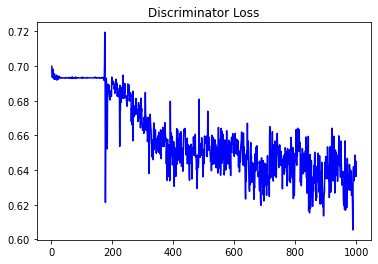

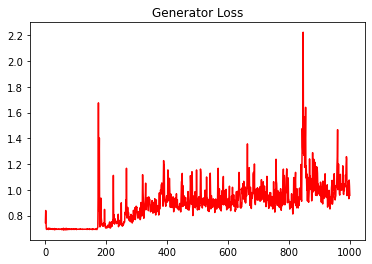

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.2725823409296572


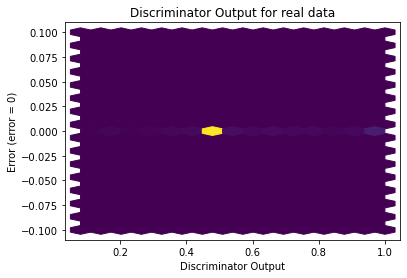

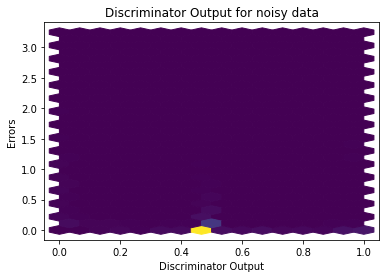

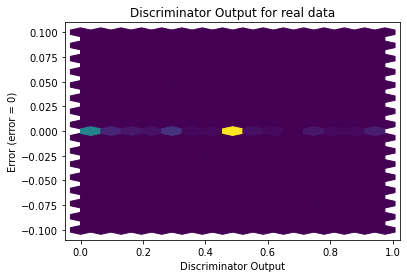

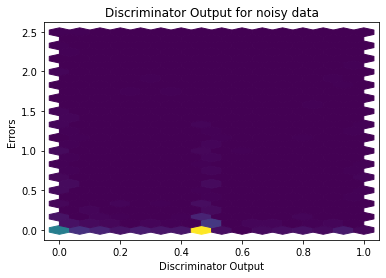

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

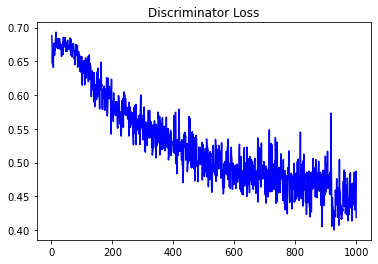

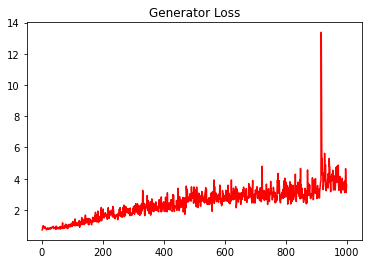

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.21426823127740885


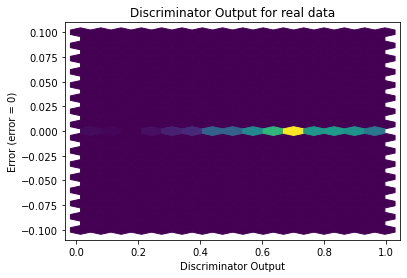

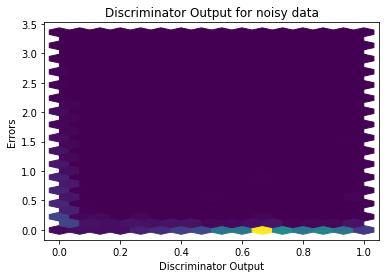

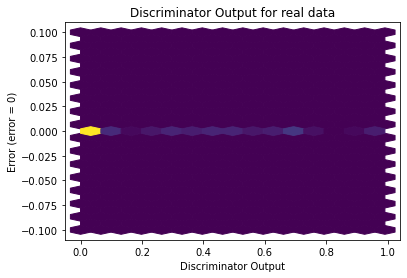

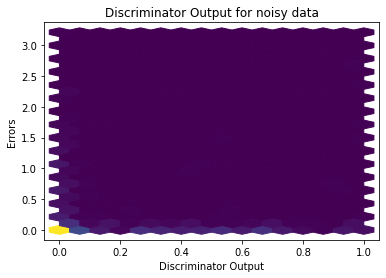

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


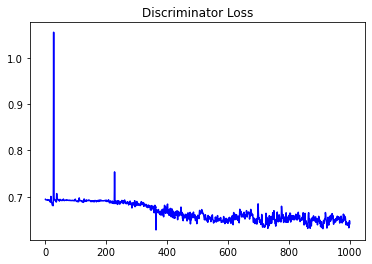

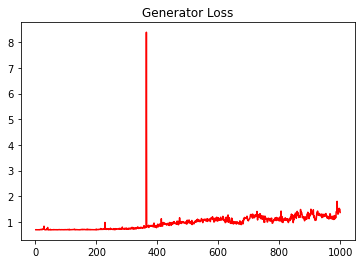

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.28200818787712384


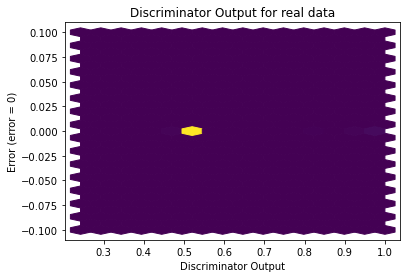

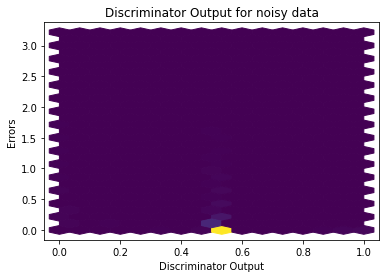

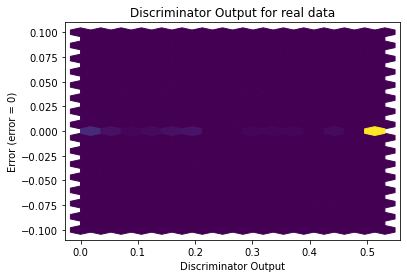

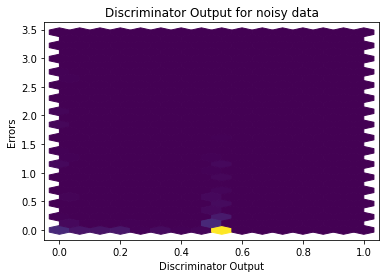

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


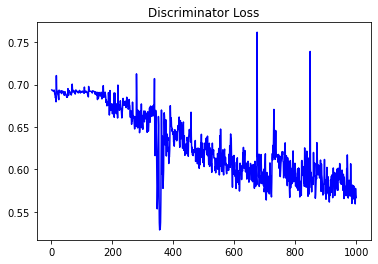

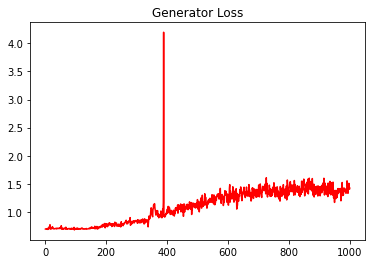

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.29578513846741805


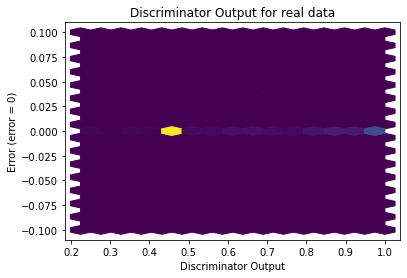

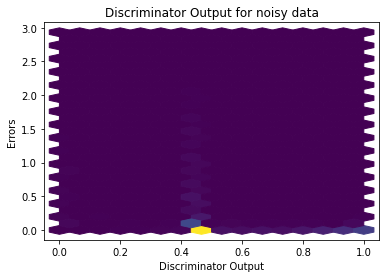

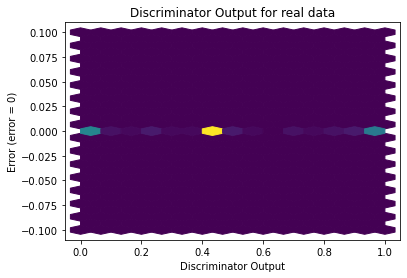

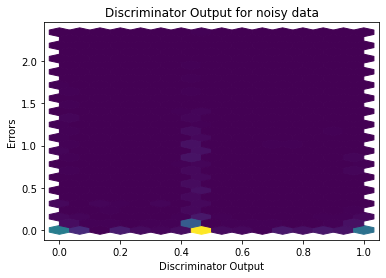

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0735]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2292]], requires_grad=True)
